# Final Excercise

In this notebook, you will find the last exercise of the lecture:
You are handed an initial dataset with several features and a univariate target. Next, you have to decide how to proceed. Since you do not have enough data to yet construct a classifier/predictor of any sensible evaluation metrics, the first task is, therefore, to acquire more data. For this purpose you can obtain batches of data according to your own design of experiments, so you will need to decide which experiments you consider necessary to perform. 

You will have four opportunities to acquire more data. Each time you have to decide which experiments to run and send those to Franz Götz-Hahn as a CSV file. The deadlines are 16.06.2023, 23.06.2023, 30.06.2023, and 07.07.2023 and 12:00 (noon). The format in all cases is a table with one row for each choosable feature, and the column entries corresponding to the desired values. Each individual sample will take approximately 30min, so pick a reasonable amount of experiments. For example, you will get the result for 100 experiments roughly 50 hours after the respective deadline. Should the experiment not be conductible, you will get a ``None`` as a result, e.g., if a feature value is out of range.

Once you have your data, you should compare the performance of different classifiers in predicting the targets. The classifiers to compare are [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). You should utilize all the different parts of the E2ML lecture that you considern appropriate. This could include Data Preprocessing, Design of Experiments for the batches, deciding on Performance Measures, Statistical Significance Testing of a hypothesis, Design of Experiments for Hyperparameter Optimization.

Should you wish to present the results from this excercise in the oral examination, you need to hand in your entire package until 14.07.2023-23:59 as a GitHub Repository. Send the link to the (public) repository to Franz Götz-Hahn via [E-Mail](mailto:franz.goetz-hahn@uni-kassel.de). Please use the README of the repository to describe the structure of the package, include any required packages in the setup.py, add the data in the data subfolder, save any results in the results subfolder, and include a _descriptive_ jupyter notebook in the notebooks subfolder.

Do note, that the point of this excercise is **not** to achieve the best performance of your models, but rather to document your process and give the motivation behind your chosen approaches, _even the ones that failed_.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# from e2ml import utils

### **Mollusc Classification** <a class="anchor" id="heart"></a>

Your dataset describes some physical measurements of a specific type of molluscs. Your goal is to predict the `Stage of Life` of the mollusc. The data you can get looks as follows:


| Sex	|Length	|Width	|Height|	Weight	|Non_Shell Weight	|Intestine Weight	|Shell Weight	|Stage of Life |
| ---                           | ----   | ----    | ----    | ----   |----             |----    |---- | ---------- |
| {Male (M), Female (F), Indeterminate (I)} | float (inches)     | float (inches)     |  float (inches)     | float (gram)      | float (gram)              | float (gram)     |  float (gram)     | {Child, Adolescent (Adole), Adult}      |

The table headings are identical to the column names in the corresponding CSV-files. 

We can send out divers that look for molluscs that fit your needs, which will subsequently be analyzed in a laboratory. You can request molluscs with all features except the Stage of Life attribute, as it is the target. The first day of diving has already been completed. After 8 hours of diving, they brought up the following molluscs:

In [2]:
initial_molluscs_data = pd.read_csv("../data/initial_molluscs_data.csv")
initial_molluscs_data

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,F,0.450,0.345,0.120,0.4165,0.1655,0.0950,0.1350,Adult
1,F,0.475,0.380,0.145,0.5700,0.1670,0.1180,0.1870,Adole
2,M,0.610,0.485,0.170,1.0225,0.4190,0.2405,0.3600,Adult
3,I,0.430,0.340,0.105,0.4405,0.2385,0.0745,0.1075,Adole
4,M,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,Adult
5,M,0.600,0.475,0.175,1.3445,0.5490,0.2875,0.3600,Child
6,I,0.515,0.390,0.110,0.5310,0.2415,0.0980,0.1615,Adult
7,F,0.625,0.495,0.160,1.1115,0.4495,0.2825,0.3450,Child
8,F,0.650,0.520,0.195,1.6275,0.6890,0.3905,0.4320,Adult
9,F,0.620,0.480,0.165,1.0430,0.4835,0.2210,0.3100,Adult


In [3]:
# Quick helper functions for calculating datapoint count and data generation time


def calculate_datapoint_count(duration_days=0, duration_hours=0):
    return (duration_days * 24 + duration_hours) * 2


def calculate_datageneration_time(datapoint_count):
    return datapoint_count / 2 / 24

### Initial data analysis:

Due to time constraints first real analysis will bes possible after 6 days. Therefor data for 6 days will be requested.

In [4]:
# Create copy of initial data
molluscs_data = initial_molluscs_data.copy()

In [5]:
# Add numeric values for Sex and Stage of life
def sex_to_num(data):
    if type(data) == pd.Series:
        return sex_to_num(data["Sex"])
    if data == "M":
        return 1
    elif data == "F":
        return 2
    elif data == "I":
        return 0
    else:
        return -1


molluscs_data["Sex_Num"] = molluscs_data.apply(lambda row: sex_to_num(row), axis=1)


def stage_to_num(data):
    if type(data) == pd.Series:
        return stage_to_num(data["Stage of Life"])
    if data == "Child":
        return 0
    elif data == "Adole":
        return 1
    elif data == "Adult":
        return 2
    else:
        return -1


molluscs_data["Stage_Num"] = molluscs_data.apply(lambda row: stage_to_num(row), axis=1)

molluscs_data

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life,Sex_Num,Stage_Num
0,F,0.450,0.345,0.120,0.4165,0.1655,0.0950,0.1350,Adult,2,2
1,F,0.475,0.380,0.145,0.5700,0.1670,0.1180,0.1870,Adole,2,1
2,M,0.610,0.485,0.170,1.0225,0.4190,0.2405,0.3600,Adult,1,2
3,I,0.430,0.340,0.105,0.4405,0.2385,0.0745,0.1075,Adole,0,1
4,M,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,Adult,1,2
5,M,0.600,0.475,0.175,1.3445,0.5490,0.2875,0.3600,Child,1,0
6,I,0.515,0.390,0.110,0.5310,0.2415,0.0980,0.1615,Adult,0,2
7,F,0.625,0.495,0.160,1.1115,0.4495,0.2825,0.3450,Child,2,0
8,F,0.650,0.520,0.195,1.6275,0.6890,0.3905,0.4320,Adult,2,2
9,F,0.620,0.480,0.165,1.0430,0.4835,0.2210,0.3100,Adult,2,2


In [6]:
# Analyze the data
molluscs_data.describe()

,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Sex_Num,Stage_Num
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.0000
mean,0.534375,0.421875,0.144062,0.877875,0.376344,0.187531,0.254938,1.3125,1.3125
std,0.124176,0.105560,0.041240,0.496578,0.224390,0.109644,0.135996,0.7932,0.7932
min,0.205000,0.155000,0.045000,0.042500,0.017000,0.005500,0.015500,0.0000,0.0000
25%,0.468750,0.371250,0.117500,0.508375,0.220625,0.097250,0.154875,1.0000,1.0000
50%,0.560000,0.442500,0.155000,0.915000,0.370500,0.201000,0.267500,1.5000,1.5000
75%,0.621250,0.487500,0.171250,1.163625,0.497125,0.268250,0.360000,2.0000,2.0000
max,0.680000,0.560000,0.195000,1.777500,0.861000,0.390500,0.455000,2.0000,2.0000


In [7]:
# Split dataset based on Sex
molluscs_data_female = molluscs_data[molluscs_data["Sex"] == "F"]
molluscs_data_male = molluscs_data[molluscs_data["Sex"] == "M"]
molluscs_data_indeterminate = molluscs_data[molluscs_data["Sex"] == "I"]
molluscs_data_dict = {
    "F": molluscs_data_female,
    "M": molluscs_data_male,
    "I": molluscs_data_indeterminate,
}

print(
    "Female:\n",
    molluscs_data_female.describe(),
    "\n\n\n\n------\nMale:\n",
    molluscs_data_male.describe(),
    "\n\n\n\n------\nIndeterminate:\n",
    molluscs_data_indeterminate.describe(),
)

Female:
          Length     Width    Height    Weight  Non_Shell Weight  \
count  8.000000  8.000000  8.000000  8.000000          8.000000   
mean   0.577500  0.455625  0.158750  1.006500          0.429688   
std    0.083195  0.072528  0.026559  0.487785          0.246048   
min    0.450000  0.345000  0.120000  0.416500          0.165500   
25%    0.520000  0.406250  0.142500  0.666375          0.266750   
50%    0.602500  0.465000  0.157500  0.925250          0.385750   
75%    0.631250  0.501250  0.172500  1.240500          0.534875   
max    0.680000  0.560000  0.195000  1.777500          0.861000   

       Intestine Weight  Shell Weight  Sex_Num  Stage_Num  
count          8.000000      8.000000      8.0   8.000000  
mean           0.219500      0.283625      2.0   1.250000  
std            0.104475      0.109641      0.0   0.707107  
min            0.095000      0.135000      2.0   0.000000  
25%            0.139000      0.193000      2.0   1.000000  
50%            0.201000    

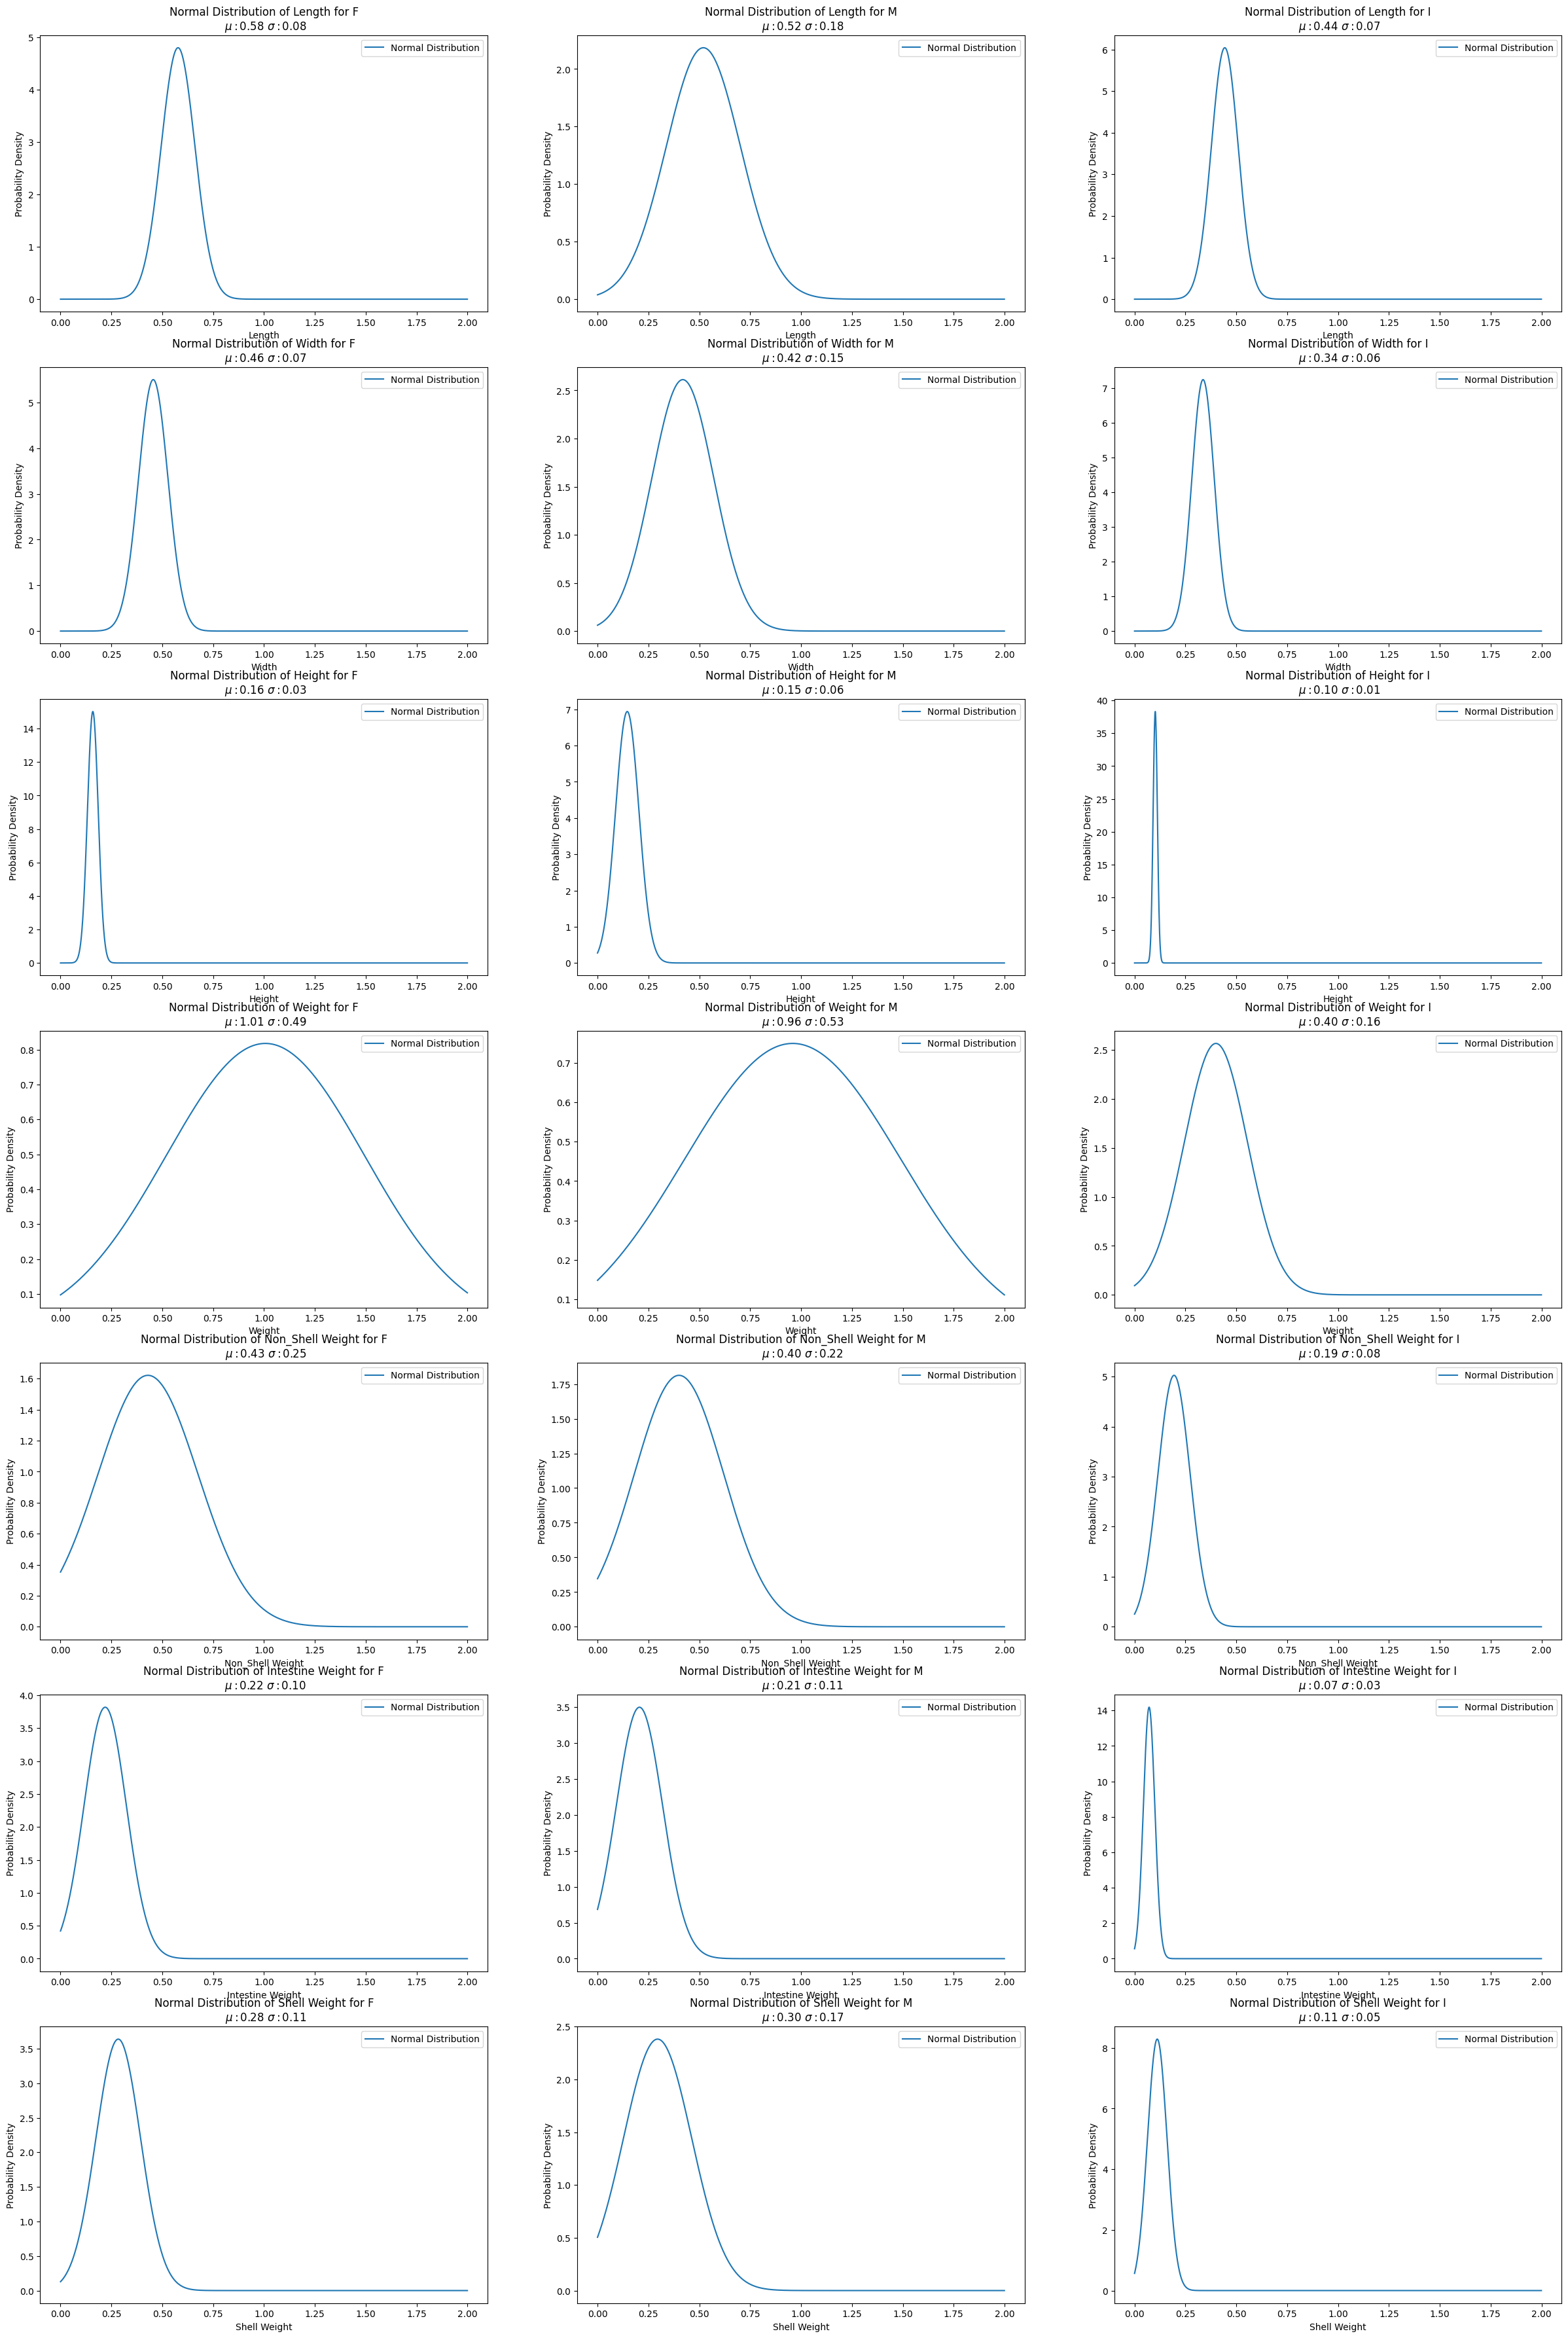

In [8]:
# Calculate the mean and standard deviation for each feature for each Sex in the dataset
female_means = dict()
male_means = dict()
indeterminate_means = dict()
female_stds = dict()
male_stds = dict()
indeterminate_stds = dict()

for feature in initial_molluscs_data.columns:
    if feature == "Sex" or feature == "Stage of Life":
        continue
    female_means[feature] = molluscs_data_female[feature].mean()
    male_means[feature] = molluscs_data_male[feature].mean()
    indeterminate_means[feature] = molluscs_data_indeterminate[feature].mean()
    female_stds[feature] = molluscs_data_female[feature].std()
    male_stds[feature] = molluscs_data_male[feature].std()
    indeterminate_stds[feature] = molluscs_data_indeterminate[feature].std()

means_dict = {
    "F": female_means,
    "M": male_means,
    "I": indeterminate_means,
}

stds_dict = {
    "F": female_stds,
    "M": male_stds,
    "I": indeterminate_stds,
}

#print(
#    "Female:\n",
#    female_means,
#    female_stds,
#    "\n------\nMale:\n",
#    male_means,
#    male_stds,
#    "\n------\nIndeterminate:\n",
#    indeterminate_means,
#    indeterminate_stds,
#    sep="\n",
#)

# Plot the normal distributions
fig, axs = plt.subplots(len(female_means), 3, figsize=(30, 45))
x_axis = np.arange(0, 2, 0.001)
rand = np.random.RandomState(42)

for i, feature in enumerate(initial_molluscs_data.drop(columns=["Sex", "Stage of Life"]).columns):
    for j, sex in enumerate(["F","M","I"]):
        ax = axs[i, j]
        mu = means_dict[sex][feature]
        sigma = stds_dict[sex][feature]
        ax.plot(x_axis, norm.pdf(x_axis, mu, sigma), label="Normal Distribution")
        ax.set_title(f"Normal Distribution of {feature} for {sex}\n $\mu:{mu:.2f}$ $\sigma:{sigma:.2f}$")
        ax.set_xlabel(feature)
        ax.set_ylabel("Probability Density")
        ax.legend()

In [9]:
# Calculate datapoint count for 6 days
datapoint_count_period_1 = calculate_datapoint_count(duration_days=6)
datapoint_count_period_1

288

##### Helper functions for generating data using latin hypercubes based on the initial data

In [10]:
from e2ml.experimentation import lat_hyp_cube, lat_hyp_cube_norm_dist

# Generate 288 new rows of data using Latin hypercube sampling


def generate_lat_hyp_cube_datareq(datapoint_count=288, random_state=42):
    """
    Generates new data request using Latin hypercube sampling
    The data request is generated using the initial data as a reference
    It contains the same features as the initial data, except for the "Stage of Life" feature

    Parameters
    ----------
    datapoint_count : int
        Number of datapoints to generate
    random_state : int
        Random state to use for the generation

    Returns
    -------
    new_data : pandas.DataFrame
        New data request generated using Latin hypercube sampling
    """
    new_data = pd.DataFrame(columns=initial_molluscs_data.columns).drop(
        columns=["Stage of Life"]
    )

    if datapoint_count == 0:
        return new_data

    new_data = pd.DataFrame(
        lat_hyp_cube(datapoint_count, len(initial_molluscs_data.columns) - 2),
        columns=initial_molluscs_data.columns.drop(["Stage of Life", "Sex"]),
    )

    # Assign a sex to each row of data make sure that data is balanced
    new_data["Sex"] = np.append(
        np.repeat(["F", "M", "I"], datapoint_count // 3),
        np.random.choice(["F", "M", "I"], datapoint_count % 3),
    )

    row_num = {"F": -1, "M": -1, "I": -1}

    for idx, row in new_data.iterrows():
        sex = str(row["Sex"])
        for feature in initial_molluscs_data.columns.drop(["Stage of Life", "Sex"]):
            row_num[sex] += 1
            if row_num[sex] == 0:
                val = molluscs_data_dict[sex][feature].min() - stds_dict[sex][feature]
                new_data.at[idx, feature] = val if val > 0 else stds_dict[sex][feature]
            elif row_num[sex] == 1:
                new_data.at[idx, feature] = (
                    molluscs_data_dict[sex][feature].max() + stds_dict[sex][feature]
                )
            else:
                dist = np.random.normal(
                    means_dict[sex][feature],
                    2 * stds_dict[sex][feature],
                    size=datapoint_count * 2,
                )
                min_val = min(dist[dist > 0])
                max_val = max(dist)
                # min_val = max(means_dict[sex][feature] - 2 * stds_dict[sex][feature], molluscs_data_dict[sex][feature].min())
                # max_val = means_dict[sex][feature] + 2 * stds_dict[sex][feature]
                # new_data.at[idx, feature] = new_data.at[idx, feature] * (molluscs_data_dict[sex][feature].max() - molluscs_data_dict[sex][feature].min()) + molluscs_data_dict[sex][feature].min()
                # new_val = 0
                # while new_val <= 0:
                #    new_val = np.random.normal(
                #        means_dict[sex][feature], stds_dict[sex][feature]
                #    )
                # new_data.at[idx, feature] = new_val
                val = 0
                while val <= 0:
                    val = new_data.at[idx, feature] * (max_val - min_val) + min_val
                new_data.at[idx, feature] = val
            while new_data.at[idx, feature] <= 0:
                new_data.at[idx, feature] = np.random.normal(
                    means_dict[sex][feature], 2 * stds_dict[sex][feature]
                )
            if new_data.at[idx, feature] <= 0:
                print(
                    "WARNING: Generated value for feature {} is negative".format(
                        feature
                    )
                )

    return new_data



def generate_lat_hyp_cube_norm_dist_datareq(datapoint_count=288):
    """
    Generates new data request using Latin hypercube sampling
    The data request is generated using the initial data as a reference
    It contains the same features as the initial data, except for the "Stage of Life" feature

    Parameters
    ----------
    datapoint_count : int
        Number of datapoints to generate

    Returns
    -------
    new_data : pandas.DataFrame
        New data request generated using Latin hypercube sampling
    """
    new_data = pd.DataFrame(columns=initial_molluscs_data.columns).drop(
        columns=["Stage of Life"]
    )

    if datapoint_count == 0:
        return new_data

    new_data = pd.DataFrame(
        np.zeros((datapoint_count, len(initial_molluscs_data.columns) - 2)),
        columns=initial_molluscs_data.columns.drop(["Stage of Life", "Sex"]),
    )

    # Assign a sex to each row of data make sure that data is balanced
    new_data["Sex"] = np.append(
        np.repeat(["F", "M", "I"], datapoint_count // 3),
        np.random.choice(["F", "M", "I"], datapoint_count % 3),
    )

    bounds = np.array([[0, None] for _ in range(len(new_data.drop(columns=["Sex"]).columns))])

    for sex in ["F", "M", "I"]:	
        data = new_data[new_data["Sex"] == sex]
        lat_hyp = lat_hyp_cube_norm_dist(
                data.shape[0] - 1,
                len(new_data.drop(columns=["Sex"]).columns),
                means_dict[sex],
                {x: stds_dict[sex][x] * 10 for x in stds_dict[sex].keys()},
                new_data.drop(columns=["Sex"]).columns,
                bounds,
                True,
                datapoint_count * 2,
            )
        print(stds_dict[sex])
        for idx, feature in enumerate(new_data.drop(columns=["Sex"]).columns):
            #print(feature)
            #print(lat_hyp[:, idx])
            new_data.loc[new_data["Sex"] == sex, feature] = lat_hyp[:, idx]
     

    return new_data

#### Generate 288 datarequests

In [11]:
# data_req_period_1 = generate_lat_hyp_cube_datareq(datapoint_count_period_1)
# data_req_period_1.to_csv("../results/data_requests/data_req_period_1.csv", index=False)
data_req_period_1 = pd.read_csv("../results/data_requests/data_req_period_1.csv")
data_req_period_1_norm = generate_lat_hyp_cube_norm_dist_datareq(
    datapoint_count_period_1
)
data_req_period_1.describe(), data_req_period_1_norm.describe()

{'Length': 0.08319512348346249, 'Width': 0.072527704066397, 'Height': 0.026558560632254584, 'Weight': 0.48778456895876254, 'Non_Shell Weight': 0.2460478956713219, 'Intestine Weight': 0.10447521920805636, 'Shell Weight': 0.10964089109451819}
{'Length': 0.18258559636510216, 'Width': 0.15274161188098023, 'Height': 0.05748912940721924, 'Weight': 0.5324874881159181, 'Non_Shell Weight': 0.22004363203692126, 'Intestine Weight': 0.11409206808538444, 'Shell Weight': 0.16753372794753896}
{'Length': 0.06601767440112787, 'Width': 0.05507570547286101, 'Height': 0.010408329997330665, 'Weight': 0.15553965196480715, 'Non_Shell Weight': 0.07939983207370992, 'Intestine Weight': 0.02812027738127773, 'Shell Weight': 0.048124837662063866}


(           Length       Width      Height      Weight  Non_Shell Weight  \
 count  288.000000  288.000000  288.000000  288.000000        288.000000   
 mean     0.600365    0.503418    0.174205    1.542079          0.810837   
 std      0.387486    0.316872    0.122141    1.214504          0.572164   
 min      0.003884    0.019546    0.003886    0.001626          0.005884   
 25%      0.301679    0.234468    0.077858    0.592120          0.342597   
 50%      0.546048    0.456292    0.140382    1.120747          0.593013   
 75%      0.803952    0.696572    0.252859    2.342415          1.312439   
 max      1.856583    1.420338    0.560663    4.770716          2.162847   
 
        Intestine Weight  Shell Weight  
 count        288.000000    288.000000  
 mean           0.355107      0.451117  
 std            0.277439      0.321942  
 min            0.000493      0.004019  
 25%            0.109560      0.205406  
 50%            0.276422      0.373136  
 75%            0.596416   

In [12]:
# Split data request by sex
data_req_period_1_female = data_req_period_1[data_req_period_1["Sex"] == "F"]
data_req_period_1_male = data_req_period_1[data_req_period_1["Sex"] == "M"]
data_req_period_1_indeterminate = data_req_period_1[data_req_period_1["Sex"] == "I"]
data_req_period_1_dict = {
    "F": data_req_period_1_female,
    "M": data_req_period_1_male,
    "I": data_req_period_1_indeterminate,
}

data_req_period_1_norm_female = data_req_period_1_norm[data_req_period_1_norm["Sex"]=="F"]
data_req_period_1_norm_male = data_req_period_1_norm[data_req_period_1_norm["Sex"] == "M"]
data_req_period_1_norm_indeterminate = data_req_period_1_norm[data_req_period_1_norm["Sex"] == "I"]
data_req_period_1_norm_dict = {
    "F": data_req_period_1_norm_female,
    "M": data_req_period_1_norm_male,
    "I": data_req_period_1_norm_indeterminate,
}

print(
    "Female:\n",
    data_req_period_1_female.describe(),
    "\n\n\n\n------\nMale:\n",
    data_req_period_1_male.describe(),
    "\n\n\n\n------\nIndeterminate:\n",
    data_req_period_1_indeterminate.describe(),
)

Female:
           Length      Width     Height     Weight  Non_Shell Weight  \
count  96.000000  96.000000  96.000000  96.000000         96.000000   
mean    0.557218   0.508095   0.162442   1.933295          1.123627   
std     0.286793   0.246581   0.096526   1.182209          0.613311   
min     0.055115   0.041002   0.005636   0.028325          0.034191   
25%     0.313461   0.302302   0.078200   0.938810          0.554809   
50%     0.513438   0.494073   0.152820   1.788931          1.279205   
75%     0.765368   0.698176   0.228915   2.860908          1.617356   
max     1.163277   1.016904   0.362777   4.770716          2.162847   

       Intestine Weight  Shell Weight  
count         96.000000     96.000000  
mean           0.461535      0.471524  
std            0.263644      0.251825  
min            0.000493      0.004019  
25%            0.237616      0.261182  
50%            0.494931      0.477911  
75%            0.660943      0.668549  
max            1.040271      0.

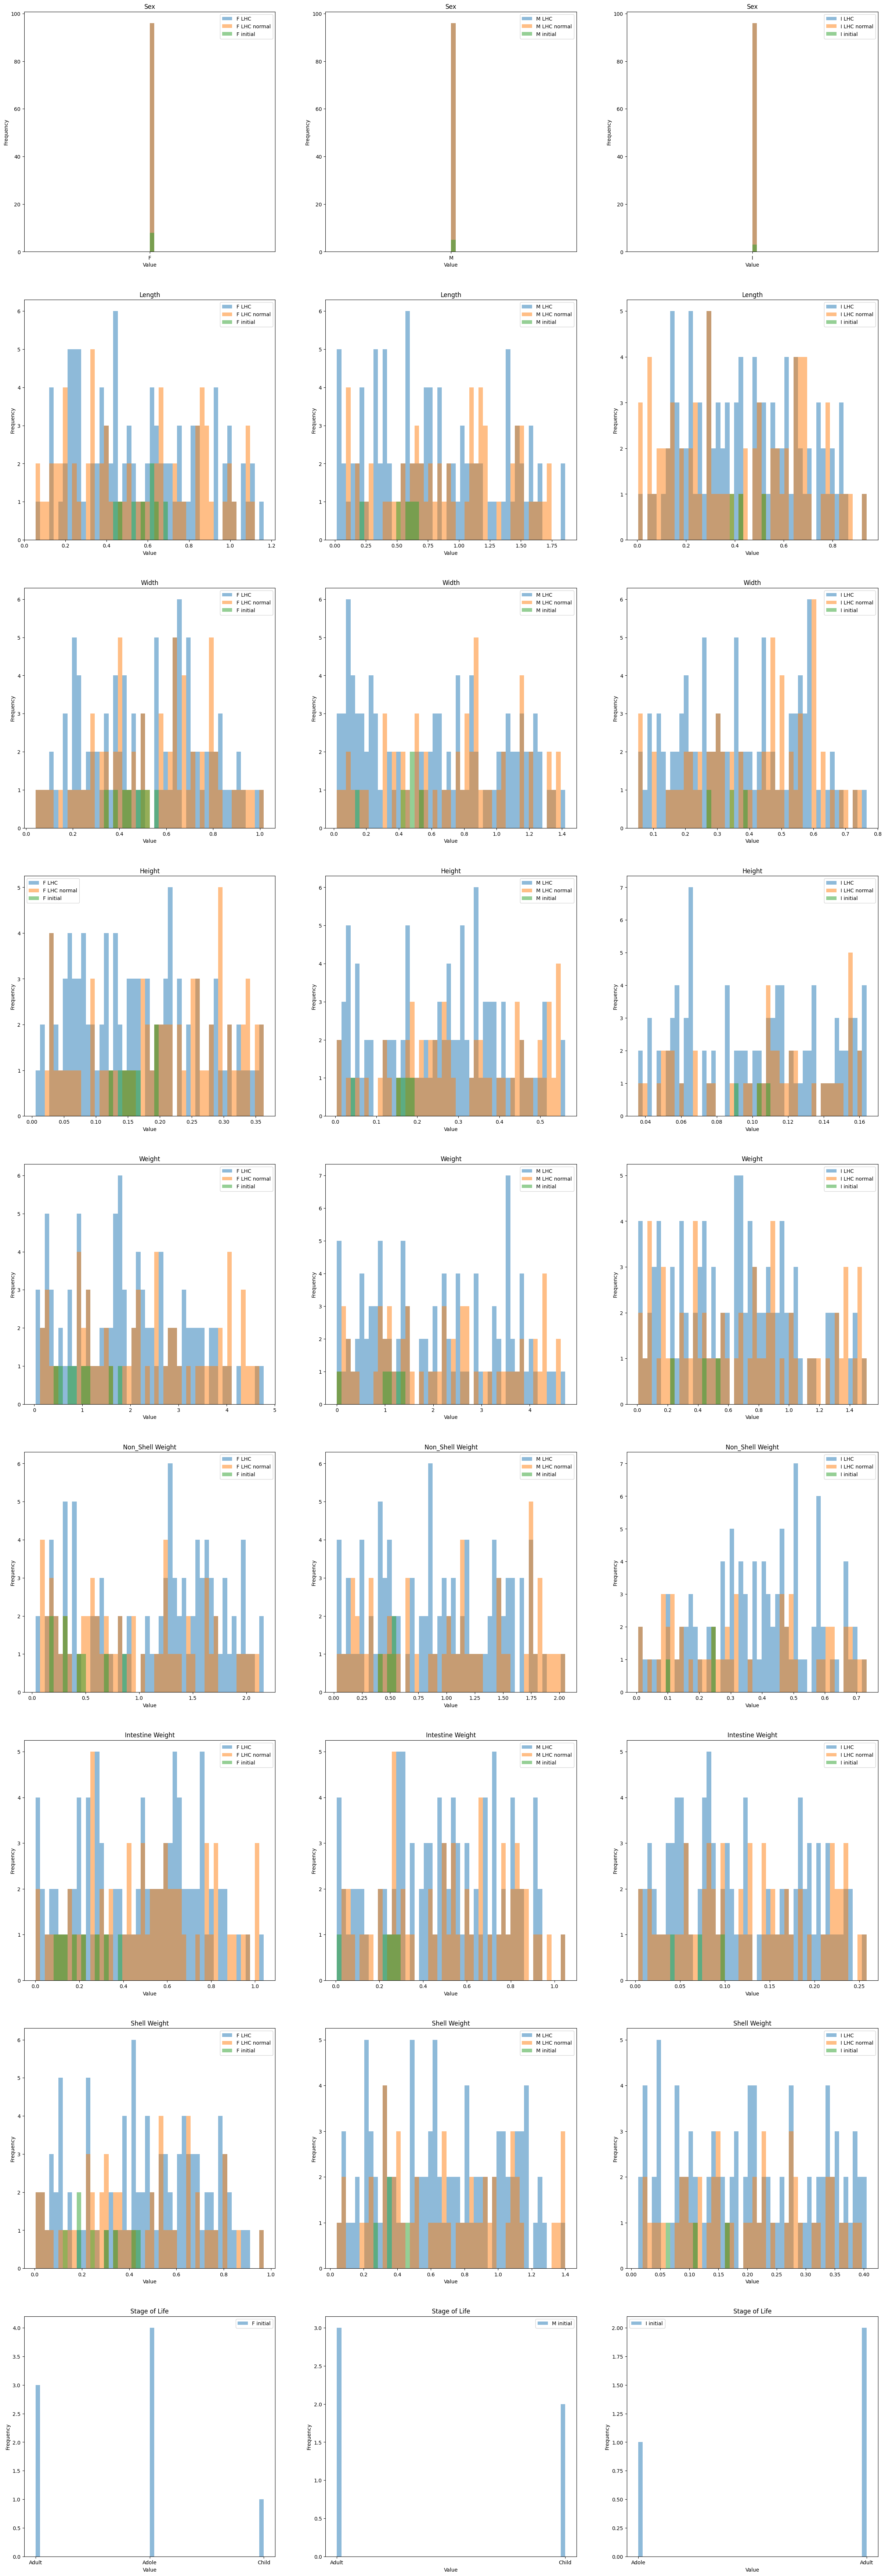

In [19]:
def plot_samples(*samples, titles=None, initiaL_data=False):
    """
    Plots the samples of the features of the initial data and the data request
    """
    feature_count = len(initial_molluscs_data.columns)
    fig, axs = plt.subplots(feature_count, 3, figsize=(30, 90))

    for idx, feature in enumerate(initial_molluscs_data.columns):
        label = ["Female", "Male", "Indeterminate"]
        titles = titles + ["Sample {}".format(i) for i in range(len(titles), len(samples))]
        for i_idx, sex in enumerate(["F", "M", "I"]):
            bins = 50
            ax = axs[idx, i_idx]
            if feature != "Stage of Life":
                for j_idx, sample in enumerate(samples):
                    (n, bins, patches) = ax.hist(
                        sample[sex][feature],
                        alpha=0.5,
                        stacked=True,
                        label=(sex + " " + titles[j_idx]),
                    ) if bins is None else ax.hist(
                        sample[sex][feature],
                        alpha=0.5,
                        stacked=True,
                        label=(sex + " " + titles[j_idx]),
                        bins = bins
                    )


            if initiaL_data:
                ax.hist(
                    molluscs_data_dict[sex][feature],
                    alpha=0.5,
                    stacked=True,
                    label=(sex + " initial"),
                    bins=bins,
                ) if bins is not None else ax.hist(
                    molluscs_data_dict[sex][feature],
                    alpha=0.5,
                    stacked=True,
                    label=(sex + " initial"),
                )

            ax.set_title(feature)
            ax.set_xlabel("Value")
            ax.set_ylabel("Frequency")
            ax.legend()
            #ax.set_yscale("log")
    plt.show()

plot_samples(data_req_period_1_dict, data_req_period_1_norm_dict, titles=["LHC", "LHC normal"], initiaL_data=True)

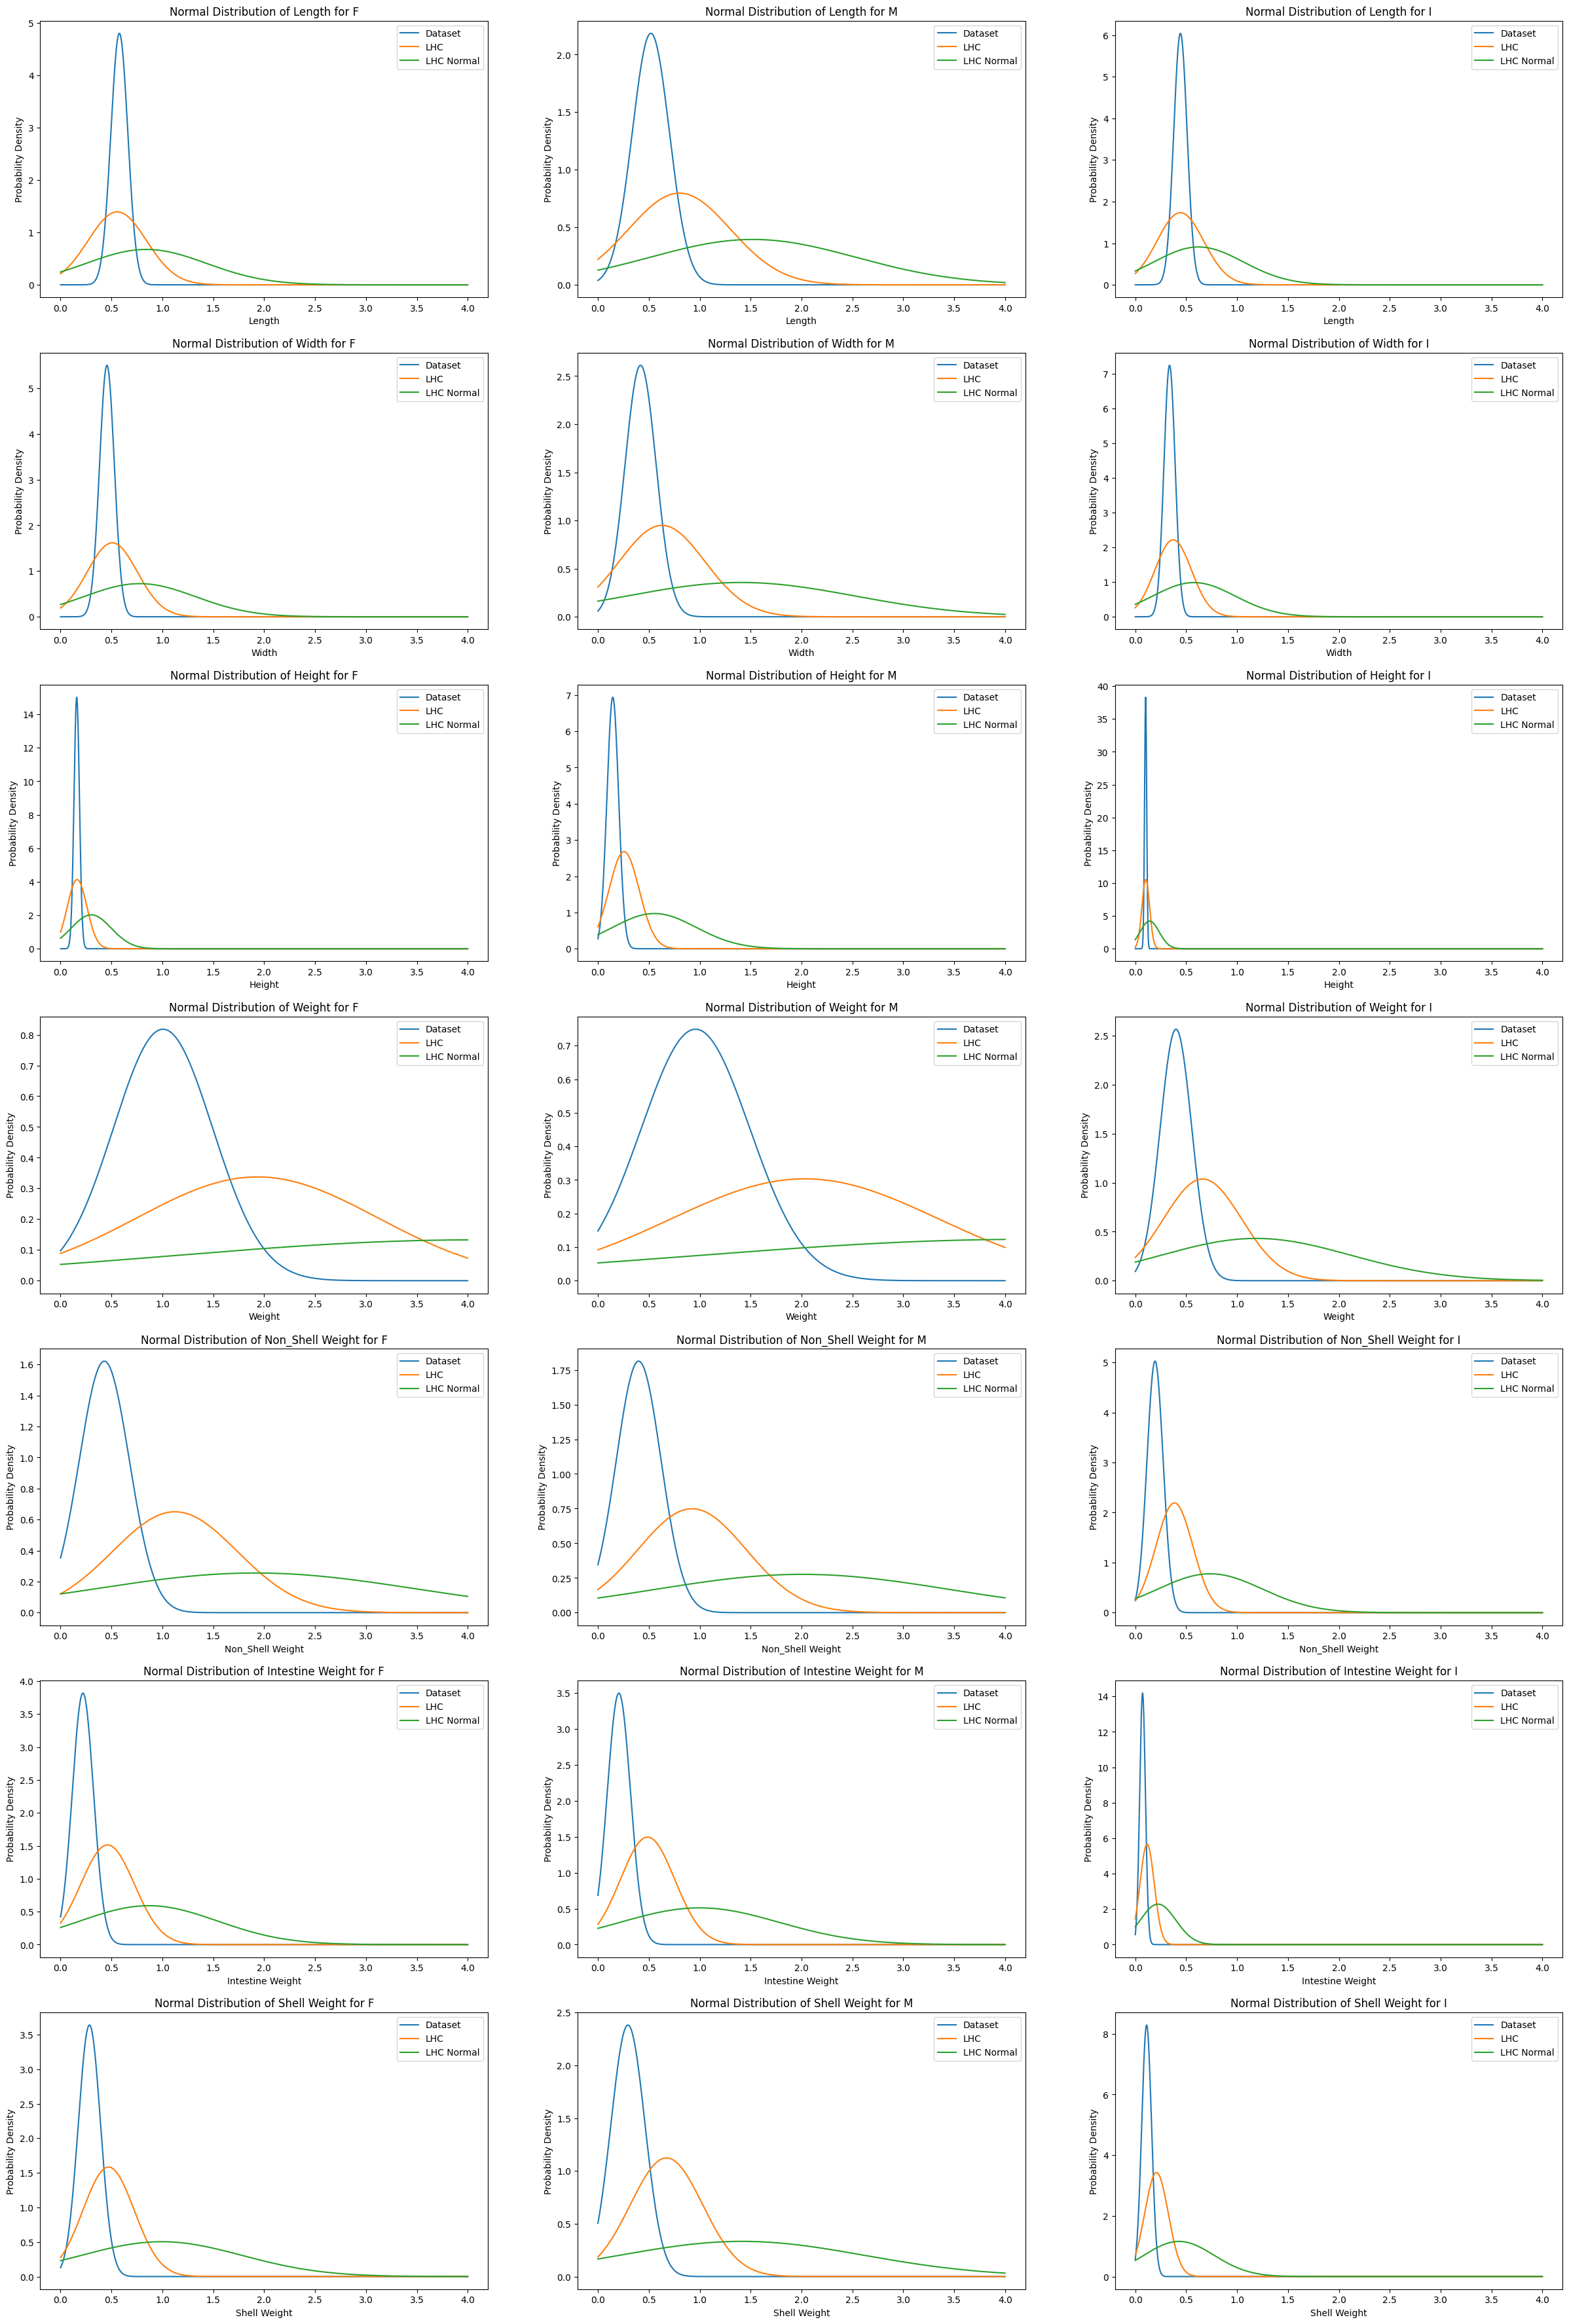

In [23]:
# Calculate the mean and standard deviation for each feature for each Sex in the data request

means_dict_samp = {
    "F": dict(),
    "M": dict(),
    "I": dict(),
}
stds_dict_samp = {
    "F": dict(),
    "M": dict(),
    "I": dict(),
}

means_dict_samp_norm = {
    "F": dict(),
    "M": dict(),
    "I": dict(),
}
stds_dict_samp_norm = {
    "F": dict(),
    "M": dict(),
    "I": dict(),
}

for sex in ["F", "M", "I"]:
    for feature in initial_molluscs_data.drop(columns=["Sex", "Stage of Life"]).columns:
        means_dict_samp[sex][feature] = data_req_period_1_dict[sex][feature].mean()
        means_dict_samp_norm[sex][feature] = data_req_period_1_norm_dict[sex][feature].mean()

        stds_dict_samp[sex][feature] = data_req_period_1_dict[sex][feature].std()
        stds_dict_samp_norm[sex][feature] = data_req_period_1_norm_dict[sex][feature].std()

#print(
#    "Female:\n",
#    female_means,
#    female_stds,
#    "\n------\nMale:\n",
#    male_means,
#    male_stds,
#    "\n------\nIndeterminate:\n",
#    indeterminate_means,
#    indeterminate_stds,
#    sep="\n",
#)

# Plot the normal distributions
fig, axs = plt.subplots(len(female_means), 3, figsize=(30, 45))
x_axis = np.arange(0, 4, 0.001)
rand = np.random.RandomState(42)

for i, feature in enumerate(initial_molluscs_data.drop(columns=["Sex", "Stage of Life"]).columns):
    for j, sex in enumerate(["F","M","I"]):
        ax = axs[i, j]
        ax.plot(x_axis, norm.pdf(x_axis, means_dict[sex][feature], stds_dict[sex][feature]), label="Dataset")
        ax.plot(x_axis, norm.pdf(x_axis, means_dict_samp[sex][feature], stds_dict_samp[sex][feature]), label="LHC")
        ax.plot(x_axis, norm.pdf(x_axis, means_dict_samp_norm[sex][feature], stds_dict_samp_norm[sex][feature]), label="LHC Normal")
        ax.set_title(f"Normal Distribution of {feature} for {sex}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Probability Density")
        ax.legend()

#### First testing of the different classifiers

In [14]:
# Extract X and Y from the dataset
X = molluscs_data.drop(columns=["Stage of Life", "Stage_Num", "Sex"])
Y = molluscs_data["Stage_Num"]


# Split the dataset into 80% training data and 20% test data.
train = np.random.choice([True, False], size=len(Y), p=[0.8, 0.2])
test = ~train

In [15]:
from sklearn import ensemble, svm, neural_network

In [16]:
# Create the different classifiers with default hyperparemeters
rfc = ensemble.RandomForestClassifier()
svc = svm.SVC()
mlp = neural_network.MLPClassifier()

classifier_dict = {"rfc": rfc, "svc": svc, "mlp": mlp}

In [17]:
# Fit the classifiers
for name, classifier in classifier_dict.items():
    classifier.fit(X[train], Y[train])
    # classifier.fit(X, Y)

c:\Users\lordp\.conda\envs\e2ml-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
from e2ml.evaluation import accuracy, cohen_kappa, macro_f1_measure

results_initial = list()

# Evaluate and print the three performance measures on the training and test set.
for cname, classifier in classifier_dict.items():
    # print(f'{cname}: ')
    for name, data in zip(["train", "test"], [train, test]):
        y_true = Y[data]
        y_pred = classifier.predict(X[data])
        acc = accuracy(y_true, y_pred)
        ck = cohen_kappa(y_true, y_pred)
        f1 = macro_f1_measure(y_true, y_pred)
        results_initial.append([cname, name, acc, ck, f1])
        # print(f'{name} accuracy: {acc:.2f}')
        # print(f'{name} Cohen kappa: {ck:.2f}')
        # print(f'{name} macro F1 measure: {f1:.2f}')
        # print()
    # print()


results_initial = pd.DataFrame(
    results_initial,
    columns=["classifier", "dataset", "accuracy", "cohen_kappa", "macro_f1_measure"],
)
results_initial

,classifier,dataset,accuracy,cohen_kappa,macro_f1_measure
0,rfc,train,1.000000,1.000000,1.000000
1,rfc,test,0.000000,-0.800000,0.000000
2,svc,train,0.538462,0.000000,0.233333
3,svc,test,0.333333,0.000000,0.166667
4,mlp,train,0.769231,0.566667,0.707843
5,mlp,test,0.333333,0.000000,0.166667
